In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the datasets
df1 = pd.read_csv('Web_analysis_results/AVP_IFT_results.csv')
df2 = pd.read_csv('Web_analysis_results/AutoPeptideML_results.csv')
df3 = pd.read_csv('Web_analysis_results/CAPTP_Toxic_prediction_results.csv')

df4 = pd.read_csv('Web_analysis_results/DBAASP_hemolysis.csv')

df_IFT = df1.copy()

# Filter df2 based on antiviral_prediction > 0.5 and toxic_prediction < 0.5
df_autoML = df2[(df2['antiviral_prediction'] > 0.5) & (df2['toxic_prediction'] < 0.5)]

# Filter df3 based on Prediction column value 'Non toxic peptide'
df_CAPTP = df3[df3['Prediction'] == 'Non toxic peptide']

df_DBAASP = df4[df4['Class'] == 'Not Active']

# Print the shapes of the filtered DataFrames
print(f"Shape of df_IFT: {df_IFT.shape}")
print(f"Shape of df_autoML: {df_autoML.shape}")
print(f"Shape of df_CAPTP: {df_CAPTP.shape}")
print(f"Shape of df_DBAASP: {df_DBAASP.shape}")

Shape of df_IFT: (306, 3)
Shape of df_autoML: (180, 4)
Shape of df_CAPTP: (226, 4)
Shape of df_DBAASP: (334, 5)


In [ ]:
df1

In [ ]:
df2

In [ ]:
df3

In [2]:
df_IFT

,ID,Sequences,Category
0,0,RRGRTGRNPNRVGD,AVP
1,1,KKKKVVAALYVLF,AVP
2,2,MSTNPKPQRKTKRNTNDRPQDV,AVP
3,4,FRYGNQMCHMKHRKTNFTSFQR,AVP
4,5,AAMRSY,AVP
...,...,...,...
301,332,VMRISNIMRIK,AVP
302,333,KKKKLLLALLFLF,AVP
303,334,AKKRKRCRF,AVP
304,335,DNKFPGQGQIVGGVYL,AVP


In [3]:
df_autoML

,ID,Sequences,toxic_prediction,antiviral_prediction
0,0,RRGRTGRNPNRVGD,0.000000,1.000000
1,1,KKKKVVAALYVLF,0.000000,1.000000
6,6,NRRRQPRGDVA,0.000000,0.666667
9,9,GYPEIQKAISNIKENKCNGTDA,0.333333,1.000000
11,11,RRGSLGIYRFPGGTNLTHCL,0.000000,1.000000
...,...,...,...,...
325,325,KKKKLVLPFLVFF,0.000000,1.000000
326,326,IINALANLIEEMKELQQRNESY,0.000000,1.000000
329,329,INAKCVNAMMELEYLYQLDKVY,0.333333,1.000000
330,330,KKKKVVATGYVLF,0.333333,1.000000


In [5]:
df_CAPTP

,ID,Sequences,Prediction,Confidence
0,1,RRGRTGRNPNRVGD,Non toxic peptide,95.18%
2,3,MSTNPKPQRKTKRNTNDRPQDV,Non toxic peptide,97.60%
3,4,RSKRGGIGRNIKR,Non toxic peptide,97.98%
5,6,AAMRSY,Non toxic peptide,99.16%
6,7,NRRRQPRGDVA,Non toxic peptide,99.15%
...,...,...,...,...
330,331,KKKKVVATGYVLF,Non toxic peptide,90.18%
331,332,ACAVATNVVKTVKRNVAAANKG,Non toxic peptide,99.11%
332,333,VMRISNIMRIK,Non toxic peptide,99.96%
334,335,AKKRKRCRF,Non toxic peptide,97.34%


In [8]:
df_DBAASP

,ID,Sequences,Strain Type,Class,Predictive value
0,0,RRGRTGRNPNRVGD,Human erythrocytes,Not Active,1.00
1,1,KKKKVVAALYVLF,Human erythrocytes,Not Active,0.76
2,2,MSTNPKPQRKTKRNTNDRPQDV,Human erythrocytes,Not Active,0.96
3,3,RSKRGGIGRNIKR,Human erythrocytes,Not Active,0.98
4,4,FRYGNQMCHMKHRKTNFTSFQR,Human erythrocytes,Not Active,0.92
...,...,...,...,...,...
332,332,VMRISNIMRIK,Human erythrocytes,Not Active,0.79
333,333,KKKKLLLALLFLF,Human erythrocytes,Not Active,0.55
334,334,AKKRKRCRF,Human erythrocytes,Not Active,0.98
335,335,DNKFPGQGQIVGGVYL,Human erythrocytes,Not Active,0.88


In [10]:
# 删除ID列
df_IFT.drop(columns=['ID'], inplace=True)
df_autoML.drop(columns=['ID'], inplace=True)
df_CAPTP.drop(columns=['ID'], inplace=True)
df_DBAASP.drop(columns=['ID'], inplace=True)

# Find the common 'Sequences' in all three datasets
common_sequences = set(df_IFT['Sequences']) & set(df_autoML['Sequences']) & set(df_CAPTP['Sequences'])& set(df_DBAASP['Sequences'])

# Merge based on the common 'Sequences'
# 修复后的代码
merged_df = pd.merge(pd.merge(pd.merge(df_IFT, df_autoML, on='Sequences', how='inner'), df_CAPTP, on='Sequences', how='inner'), df_DBAASP, on='Sequences', how='inner') 

# 计算序列长度
merged_df['Length'] = merged_df['Sequences'].apply(len)

# Output the merged dataset
merged_df

,Sequences,Category,toxic_prediction,antiviral_prediction,Prediction,Confidence,Strain Type,Class,Predictive value,Length
0,RRGRTGRNPNRVGD,AVP,0.000000,1.000000,Non toxic peptide,95.18%,Human erythrocytes,Not Active,1.00,14
1,NRRRQPRGDVA,AVP,0.000000,0.666667,Non toxic peptide,99.15%,Human erythrocytes,Not Active,1.00,11
2,RRGSLGIYRFPGGTNLTHCL,AVP,0.000000,1.000000,Non toxic peptide,94.15%,Human erythrocytes,Not Active,0.87,20
3,KKRKLAAPAVLGLA,AVP,0.000000,1.000000,Non toxic peptide,94.72%,Human erythrocytes,Not Active,0.82,14
4,HCSLFKDF,AVP,0.000000,1.000000,Non toxic peptide,93.64%,Human erythrocytes,Not Active,0.98,8
...,...,...,...,...,...,...,...,...,...,...
92,ETKWEEWEKKIEEILKKIEELI,AVP,0.000000,1.000000,Non toxic peptide,86.73%,Human erythrocytes,Not Active,0.91,22
93,KKKKAVAATYVAT,AVP,0.000000,1.000000,Non toxic peptide,93.82%,Human erythrocytes,Not Active,0.78,13
94,ADQEVCAATYAAAALAVAA,AVP,0.333333,1.000000,Non toxic peptide,90.73%,Human erythrocytes,Not Active,0.82,19
95,KKKKTLLPTLFFV,AVP,0.000000,1.000000,Non toxic peptide,99.03%,Human erythrocytes,Not Active,0.80,13


In [11]:
# Save the DataFrame to a CSV file
merged_df.to_csv('Web_analysis_results/Final_filter_result.csv', index=False)

In [12]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

# 将DataFrame中的序列转换为SeqRecord对象
fasta_sequences = [SeqRecord(Seq(seq), id=str(index), description="") for index, seq in enumerate(merged_df['Sequences'])]

# 将SeqRecord对象写入FASTA文件
SeqIO.write(fasta_sequences, 'Web_analysis_results/Final_filter_result.fasta', "fasta")

97

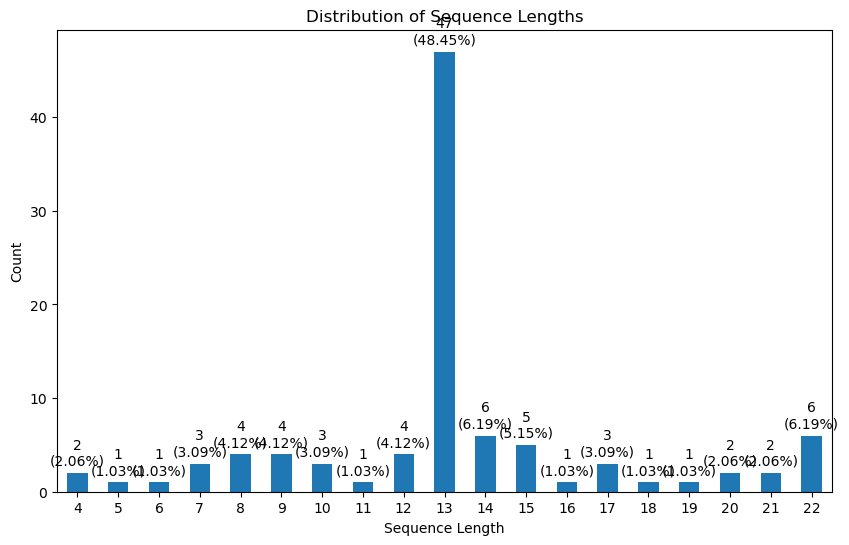

In [13]:
import matplotlib.pyplot as plt

# 计算序列长度
merged_df['Length'] = merged_df['Sequences'].apply(len)

# 计算长度的数目和占比
length_counts = merged_df['Length'].value_counts().sort_index()
length_percentages = (length_counts / length_counts.sum()) * 100

# 绘制序列长度的柱状图
plt.figure(figsize=(10, 6))
ax = length_counts.plot(kind='bar')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.title('Distribution of Sequence Lengths')
plt.xticks(rotation=0)

# 在柱子上显示数目和占比
for i, (count, percentage) in enumerate(zip(length_counts, length_percentages)):
    ax.text(i, count + 0.5, f'{count}\n({percentage:.2f}%)', ha='center', va='bottom')

plt.show()